#Welcome to Minuteman II project

In this project you will find out what is Minuteman II, what was the intention of creating it and what are all the mathematical operations that are behind.

We suggest you to always have a look at the Index section you can find top left of this document. There, everything is organized with the exercises we were asked to do and really useful extra comments that can help the corrector to understand for what we have been through all this time.

Let's start having an quick look of what is 'Minuteman II'

# Exercise 1: What is Minuteman II?

**The LGM-30F Minuteman-II** was an improved version of the
Minuteman-I missile. Development on the Minuteman-II began in **1962** as the Minuteman-I entered the Strategic Air Command's nuclear force. Minuteman-II production and deployment began in 1965 and completed in 1967. **It had an increased range, greater throw weight and guidance system with better azimuthal coverage**, providing military planners with better accuracy and a wider range of targets. Some missiles also carried penetration aids, allowing the higher probability of kill against Moscow's anti-ballistic missile system. **The payload consisted of a single Mk-11C** reentry vehicle **containing a W56 nuclear warhead** with a yield of 1.2 megatons of TNT (5 PJ).


## **SOME CHARACTERISTICS**

This missile has a diameter of 5 feet and 6 inches (1.7 m) in the
first stage, and its detonation mechanism is air-burst or contact with
the surface.

• The range of this missile is around 8100 miles, which is 13.000 km
more or less.

• Its flight altitude is 700 miles (1120 km), and its speed is
approximately 17.507 mph or 28176 km/h, or 7,8 km/s in its terminal
phase).

• The guidance system of the missile is of type Inertial NS-50, and it's
usually launched using a missile silo.

• The warhead of the missile is nuclear (W62, W78 or W87)

• The engine of this missile is a three-stage solid-fuel rocket engine,
so it's a multi-stage rocket, each of which contains its own engines
and propellant. The staging allows the thrust of the remaining stages
to more easily accelerate the rocket to its final speed and height.

# Exercise 2: Previous calculations

Throughout all the project, we will require some information that we will provide us the tools to calculate everything we need. This information is provided in Table 1 (find below)


##**TABLE 1: PREVIOUS INFORMATION**

Total mass ( Mt ), propellant mass ( Mp ), average specific impulse ( Isp ), average thrust ( T ), burn time ( tbo ) and burn-out altitude ( hbo ) for the ballistic missile Minuteman II.

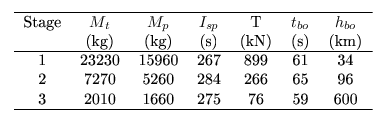

The result of trasnfering all the information above into a Python programme is:

In [6]:
#Importing all the libraries beforehand
import math
import numpy as np
import matplotlib.pylab as plt

#Previous information we'll need

#Constants

G = 6.67259 * (10**-11)
Me = 5.98 * (10**24)
Re = 6.377 * (10**6)

#Stage 1:
Mt1 = 23230
Mp1 = 15960
Isp1 = 267
tbo1 = 61
hbo1 = 34000
vo1 = 0

#Stage 2:

Mt2 = 7270
Mp2 = 5260
Isp2 = 284
tbo2 = 65
hbo2 = 96000

#Stage 3:

Mt3 = 2010
Mp3 = 1660
Isp3 = 275
tbo3 = 59
hbo3 = 600000

#Gravity at each stage:
g1 = (G*Me)/(Re)**2
g2 = (G*Me)/(Re+hbo1)**2
g3 = (G*Me)/(Re+hbo2)**2


## 2.a) Exhaust velocity

Let's calculate the exhaust velocity that will be helpful for future calculations.

In [7]:
#Exhaust velocity at each stage:

u1 = g1*Isp1
u2 = g2*Isp2
u3 = g3*Isp3
print("Exercise 2.a)\n")
print("The exhaust velocity at stage 1 is: ",np.round(u1,2),"m/s")
print("The exhaust velocity at stage 2 is: ",np.round(u2,2), "m/s")
print("The exhaust velocity at stage 3 is: ",np.round(u3,2), "m/s\n")
print("------------------------\n")


Exercise 2.a)

The exhaust velocity at stage 1 is:  2619.84 m/s
The exhaust velocity at stage 2 is:  2757.16 m/s
The exhaust velocity at stage 3 is:  2618.89 m/s

------------------------



##2.b) Increment of velocity

In [8]:
print("Exercise 2.b)\n")

def incrementVelocity (u,M0,Mf,g,tbo):
    return u*math.log(M0/Mf) -(g*tbo)


print("The increment of velocity at stage 1 is: ", np.round(incrementVelocity(u1,Mt1,Mt2,g1,tbo1),2), "m/s")
print("The increment of velocity at stage 2 is: ",np.round(incrementVelocity(u2,Mt2,Mt3,g2,tbo2),2),"m/s")
print("The increment of velocity at stage 3 is: ",np.round(incrementVelocity(u3,Mt3,Mt3-1660,g3,tbo3),2),"m/s\n")

print("------------------------\n")

Exercise 2.b)

The increment of velocity at stage 1 is:  2444.89 m/s
The increment of velocity at stage 2 is:  2913.63 m/s
The increment of velocity at stage 3 is:  4015.83 m/s

------------------------



## 2.c) Final velocity

Here we can find the final velocities after each stage

In [9]:
print("Exercise 2.c)\n")

def finalVelocity (u,M0,Mf,g,tbo,v0):
    v = u*math.log(M0/Mf) -(g*tbo) + v0
    return v

vo2 = finalVelocity(u1,Mt1,Mt2,g1,tbo1,vo1)
vo3 = finalVelocity(u1,Mt1,Mt2,g1,tbo1,vo2)

print("The final velocity at stage 1 is: ", np.round(finalVelocity(u1,Mt1,Mt2,g1,tbo1,vo1),2), "m/s")
print("The final velocity at stage 2 is: ",np.round(finalVelocity(u2,Mt2,Mt3,g2,tbo2,vo2),2),"m/s")
print("The final velocity at stage 3 is: ",np.round(finalVelocity(u3,Mt3,Mt3-1660,g3,tbo3,vo3),2),"m/s")


Exercise 2.c)

The final velocity at stage 1 is:  2444.89 m/s
The final velocity at stage 2 is:  5358.52 m/s
The final velocity at stage 3 is:  8905.62 m/s


# Exercise 3: Euler's method for a specific launching with (only) coriolis effect

After knowing all the final velocities after each stage and what is more, the final velocity after stage 3, we can start working on Exercise 3.

In exercise 3 we were meant to calculate, thanks to Euler's method, the Coriolis effect from the beginning of the trajectory (at height 600km) to its impact with the earth surface.

Let's have a look at the code:

In [12]:
#Problem parameters (in International System Units I.S.U)

m = Mt3  #mass of the Minuteman after Stage 3
w = (2*np.pi)/(24*3600) #Angular velocity of the earth

#Changing sexagesimal degrees to radians:

ag = 25*np.pi/180

#Initial condicions. We need to establish in Python every initial position and velocity:

vo= np.round(finalVelocity(u3,Mt3,Mt3-1660,g3,tbo3,vo3),2)
xo=0
yo=0
zo= 600000
vox=0
voy= np.cos(ag)*vo #Have a look that we need to use trigonometry to split the angle in each axis.
voz = np.sin(ag)*vo #Have a look that we need to use trigonometry to split the angle in each axis.

#Time steps (dt) and final time of the simulation#We have got the final time pretending a simple parabolic motion. Its equation would be: -(1/2)*g*(t**2)+v*np.sin(ag)*t+zo// with g = -8.197
#After doing a simple quadratic equation we get tha value of tfinal:

tfinal=860.46 + 100 #we add 100s extra
dt = (tfinal)/2000

#Creating the time vector:

time=np.arange(0,tfinal,dt)
lal=time.size #Total time steps it will require

#Creating an empty vector with 'lal' zeros:

g = np.zeros(lal)

xx = np.zeros(lal)
yy = np.zeros(lal)
zz = np.zeros(lal)

vx = np.zeros(lal)
vy = np.zeros(lal)
vz = np.zeros(lal)

ax = np.zeros(lal)
ay = np.zeros(lal)
az = np.zeros(lal)

lat = np.zeros(lal)
long = np.zeros(lal)

#We must save in the first element of the vectors created above:
xx[0]=xo
yy[0]=yo
zz[0]=zo

vx[0]=vox
vy[0]=-voy
vz[0]=voz

long[0] = -1.92  #it is the longitude in Malmstrom AFB, Montana
lat[0]= .82 #it is the latitude in Malmstrom AFB, Montana
g[0] = -8.197




Once we have all the vectors created with its respective initial positions added we can start using the loop to add, and calculate all the positions, velocities and accelerations.

In [14]:
i = 1

while zz[i - 1] >= 0 and i < lal:  # Add condition to stop if 'i' exceeds array size
    g[i] = -(G * Me) / (((Re + zz[i - 1]) ** 2))
    
    ax[i] = 2 * w * vy[i - 1] * (np.sin(lat[i - 1]))
    ay[i] = -2 * w * (vz[i - 1] * np.cos(lat[i - 1]) + vx[i - 1] * np.sin(lat[i - 1]))
    az[i] = 2 * w * vy[i - 1] * np.cos(lat[i - 1]) + g[i - 1]

    vx[i] = vx[i - 1] + ax[i - 1] * dt
    vy[i] = vy[i - 1] + ay[i - 1] * dt
    vz[i] = vz[i - 1] + az[i - 1] * dt

    xx[i] = xx[i - 1] + vx[i - 1] * dt
    yy[i] = yy[i - 1] + vy[i - 1] * dt
    zz[i] = zz[i - 1] + vz[i - 1] * dt

    dlat = (xx[i] - xx[i - 1]) / Re
    lat[i] = lat[i - 1] + dlat
    dlong = (yy[i] - yy[i - 1]) / (Re * np.cos(lat[i - 1]))
    long[i] = long[i - 1] + dlong
    
    print(vx[i], vy[i])

    i += 1  # increment 'i'


0.0 -8071.232754389331
-0.08243645030354368 -8071.2686228748
-0.16487290060708737 -8071.304491360269
-0.24730971725747172 -8071.340350767703
-0.32974690015919167 -8071.376201097094
-0.4121844491240213 -8071.41204234926
-0.49462236396373294 -8071.44787452502
-0.5770606444901055 -8071.483697625189
-0.6594992905149247 -8071.5195116505865
-0.7419383018499829 -8071.555316602029
-0.8243776783070789 -8071.591112480332
-0.9068174196980183 -8071.626899286314
-0.9892575258346135 -8071.6626770207895
-1.0716979965286832 -8071.698445684574
-1.154138831592053 -8071.734205278483
-1.236580030836555 -8071.769955803333
-1.3190215940740282 -8071.805697259936
-1.4014635211163178 -8071.841429649108
-1.483905811775276 -8071.877152971663
-1.5663484658627613 -8071.912867228415
-1.6487914831906392 -8071.948572420177
-1.7312348635707815 -8071.9842685477615
-1.8136786068150668 -8072.0199556119815
-1.8961227127353801 -8072.05563361365
-1.9785671811436134 -8072.091302553578
-2.061012011851665 -8072.126962432579
-2

Finally, let's print out all the graphs, the total range, the deviation due to Coriolis and the final point (in coordinates) that the Minuteman will end up.

In [15]:
#We need to define the real t, y, x and z because of Euler's method

tfinreal=time[i-1]
yfinreal=yy[i-1]
xfinreal = xx[i-1]
zfinreal = zz[i-1]

#Final time:

print('The final time: ', tfinreal, 's')

#Total range:

print('The total range (in module) of the trajectory is:', np.round(np.sqrt((xfinreal-xx[0])**2+(yfinreal-yy[0])**2+(zfinreal-zz[0])**2),2),' m.', "(In km: ",np.round(np.sqrt((xfinreal-xx[0])**2+(yfinreal-yy[0])**2+(zfinreal-zz[0])**2)/1000,2),"km)" )

#Increment of Longitude (y axis):

print('\nThe increment of longitude is:', np.round((yfinreal),2), ' m.', "(In km: ",np.round((yfinreal)/1000,2),"km)" )

#Increment of latitude (x axis):

print('The increment of latitude is :', np.round(xfinreal,2),'m')

#Increment of altitude (z axis):
print('The increment of altitude is:', np.round((zfinreal-zz[0]),2),'m',  "(In km: ",np.round((zfinreal-zz[0])/1000,2),"km)")



The final time:  960.363954 s
The total range (in module) of the trajectory is: 7803949.04  m. (In km:  7803.95 km)

The increment of longitude is: -7793971.02  m. (In km:  -7793.97 km)
The increment of latitude is : -394309.18 m
The increment of altitude is: 12515.08 m (In km:  12.52 km)


Next, we will print all the plots, these are really useful to understand what is really happening in our mathematical calculations.

Note for the proofreader: remember this code-box will get a coding problem due all the variables 'are not defined'. (You can plot everything right below, see index if necessary)

In [ ]:
#Plot results:

# Graph that prints the positions of y and z respect the time.
plt.figure(1)
plt.plot(time,yy,'k',label='y');
plt.plot(time,zz,'b',label='z');
plt.xlabel('Tiempo (s)');
plt.ylabel('Posiciones (m)'); plt.legend(loc=1,prop={'size':16})
plt.xlim(0,tfinreal)
plt.show()

# Graph that prints the velocities of vy and vz respect the time.
plt.figure(2)
plt.plot(time,vy,'k',label='vy'); plt.plot(time,vz,'b',label='vz'); plt.xlabel('Tiempo (s)');
plt.ylabel('Velocidades (m/s)'); plt.legend(loc=1,prop={'size':16})
plt.xlim(0,tfinreal)
plt.show()

# Graph in the trajectory x-y-z (3D) (Ignore the printed line in z=0)
plt.figure(3)
plt.axes(projection = "3d")
plt.plot(xx, yy, zz, linewidth = 3, color = "blue", label = "Trayectoria")
plt.legend()
plt.xlabel("Posicion x (m)")
plt.ylabel("Posicion y (m)")
plt.title("Trayectoria en 3D")
plt.show()

# Exercise 4: Euler's method for a specific launching with coriolis, air friction and centrifugal force

After seeing all the exercise 3, exercise 4 is quite similar. The only differences you can notice is, in the loop the addition of the air friction force $\vec F_f=-b|\vec v|\vec v$ and the centrifugal force.

Let's have a look at the code:

In [ ]:
#Problem parameters (in International System Units I.S.U)

m = Mt3  #mass of the Minuteman after Stage 3
w = (2*np.pi)/(24*3600) #Angular velocity of the earth

#Changing sexagesimal degrees to radians:

ag = 25*np.pi/180

#Initial condicions. We need to establish in Python every initial position and velocity:

vo= np.round(finalVelocity(u3,Mt3,Mt3-1660,g3,tbo3,vo3),2)
xo=0
yo=0
zo= 600000
vox=0
voy= np.cos(ag)*vo #Have a look that we need to use trigonometry to split the angle in each axis.
voz = np.sin(ag)*vo #Have a look that we need to use trigonometry to split the angle in each axis.

#Time steps (dt) and final time of the simulation#We have got the final time pretending a simple parabolic motion. Its equation would be: -(1/2)*g*(t**2)+v*np.sin(ag)*t+zo// with g = -8.197
#After doing a simple quadratic equation we get tha value of tfinal:

tfinal=860.46 + 100 #we add 100s extra
dt = (tfinal)/2000

#Creating the time vector:

time=np.arange(0,tfinal,dt)
lal=time.size #Total time steps it will require

#Creating an empty vector with 'lal' zeros:

g = np.zeros(lal)

xx = np.zeros(lal)
yy = np.zeros(lal)
zz = np.zeros(lal)

vx = np.zeros(lal)
vy = np.zeros(lal)
vz = np.zeros(lal)

ax = np.zeros(lal)
ay = np.zeros(lal)
az = np.zeros(lal)

lat = np.zeros(lal)
long = np.zeros(lal)

#We must save in the first element of the vectors created above:
xx[0]=xo
yy[0]=yo
zz[0]=zo

vx[0]=vox
vy[0]=-voy
vz[0]=voz

long[0] = -1.92  #it is the longitude in Malmstrom AFB, Montana
lat[0]= .82 #it is the latitude in Malmstrom AFB, Montana
g[0] = -8.197




Once we have all the vectors created with its respective initial positions added we can start using the loop to add, and calculate all the positions, velocities and accelerations.

In [ ]:
i = 1
b= 0.0001
while zz[i - 1] > 0:

        g[i] = -(G * Me) /(((Re+zz[i - 1])**2))

        ax[i] = 2*w*vy[i - 1]*(np.sin(lat[i-1])) - ((b/m)*vmod[i-1]*vx[i-1]) +(w**2)*(zz[i-1]+Re)*np.sin(lat[i-1])*np.cos(lat[i-1])
        ay[i] = -2*w*(vz[i - 1]*np.cos(lat[i-1])+vx[i-1]*np.sin(lat[i-1])) -(b/m)*vmod[i-1]*vy[i-1]
        az[i] = 2*w*vy[i - 1]*np.cos(lat[i-1]) +g[i-1] - ((b/m)*vmod[i-1]*vz[i-1]) +(w**2)*(zz[i-1]+Re)*(np.cos(lat[i-1]))**2


        vx[i] = vx[i - 1] + ax[i-1] * dt
        vy[i] = vy[i - 1] + ay[i-1] * dt
        vz[i] = vz[i - 1] + az[i-1] * dt
        vmod[i] = np.sqrt(vx[i-1]**2 + vy[i-1]**2 + vz[i-1]**2)

        xx[i] = xx[i - 1] + vx[i - 1] * dt
        yy[i] = yy[i - 1] + vy[i - 1] * dt
        zz[i] = zz[i - 1] + vz[i - 1] * dt

        dlat = -(xx[i] - xx[i - 1]) / (Re)
        lat [i]= lat[i - 1] + dlat
        dlong = (yy[i]-yy[i-1])/(Re*np.cos(lat[i - 1]))
        long [i] = long [i-1] +dlong
        print(vx[i],zz[i],yy[i],vy[i], lat[i])
        i = i + 1

Finally, let's print out all the graphs, the total range, the deviation due to Coriolis and the final point (in coordinates) that the Minuteman will end up.

In [ ]:
#We need to define the real t, y, x and z because of Euler's method

tfinreal=time[i-1]
yfinreal=yy[i-1]
xfinreal = xx[i-1]
zfinreal = zz[i-1]

#Final time:

print('The final time: ', tfinreal, 's')

#Total range:

print('The total range (in module) of the trajectory is:', np.round(np.sqrt((xfinreal-xx[0])**2+(yfinreal-yy[0])**2+(zfinreal-zz[0])**2),2),' m.', "(In km: ",np.round(np.sqrt((xfinreal-xx[0])**2+(yfinreal-yy[0])**2+(zfinreal-zz[0])**2)/1000,2),"km)" )

#Increment of Longitude (y axis):

print('\nThe increment of longitude is:', np.round((yfinreal),2), ' m.', "(In km: ",np.round((yfinreal)/1000,2),"km)" )

#Increment of latitude (x axis):

print('The increment of latitude is :', np.round(xfinreal,2),'m')

#Increment of altitude (z axis):
print('The increment of altitude is:', np.round((zfinreal-zz[0]),2),'m',  "(In km: ",np.round((zfinreal-zz[0])/1000,2),"km)")



Next, we will print all the plots, these are really useful to understand what is really happening in our mathematical calculations.

Note for the proofreader: remember this code-box will get a coding problem due all the variables 'are not defined'. (You can plot everything right below, see index if necessary)

In [ ]:
#Plot results:

# Graph that prints the positions of y and z respect the time.
plt.figure(1)
plt.plot(time,yy,'k',label='y');
plt.plot(time,zz,'b',label='z');
plt.xlabel('Tiempo (s)');
plt.ylabel('Posiciones (m)'); plt.legend(loc=1,prop={'size':16})
plt.xlim(0,tfinreal)
plt.show()

# Graph that prints the velocities of vy and vz respect the time.
plt.figure(2)
plt.plot(time,vy,'k',label='vy'); plt.plot(time,vz,'b',label='vz'); plt.xlabel('Tiempo (s)');
plt.ylabel('Velocidades (m/s)'); plt.legend(loc=1,prop={'size':16})
plt.xlim(0,tfinreal)
plt.show()

# Graph in the trajectory x-y-z (3D) (Ignore the printed line in z=0)
plt.figure(3)
plt.axes(projection = "3d")
plt.plot(xx, yy, zz, linewidth = 3, color = "blue", label = "Trayectoria")
plt.legend()
plt.xlabel("Posicion x (m)")
plt.ylabel("Posicion y (m)")
plt.title("Trayectoria en 3D")
plt.show()

# TOTAL CODE WITH NO PARTITIONS

## Exercise 3


-------------------------------
The final time:  872.1 s
The total range (in module) of the trajectory is: 5387485.46  m. (In km:  5387.49 km)

The increment of longitude is: -5348213.18  m. (In km:  -5348.21 km)
The increment of latitude is : -246685.68 m
The increment of altitude is: -600634.27 m (In km:  -600.63 km)


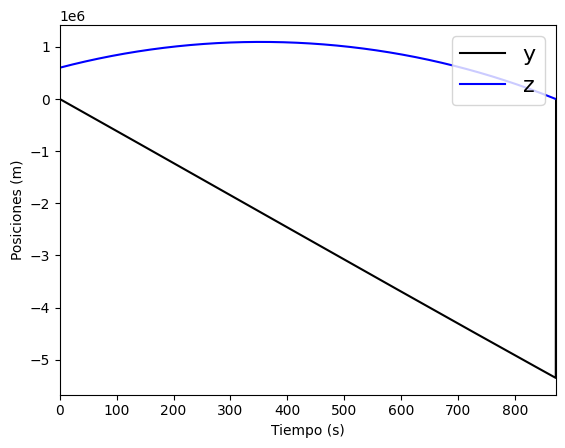

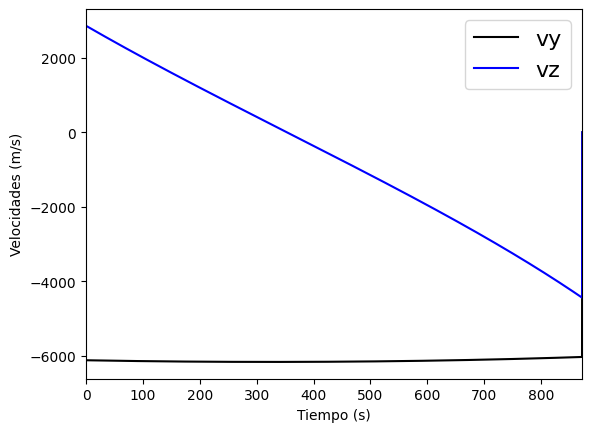

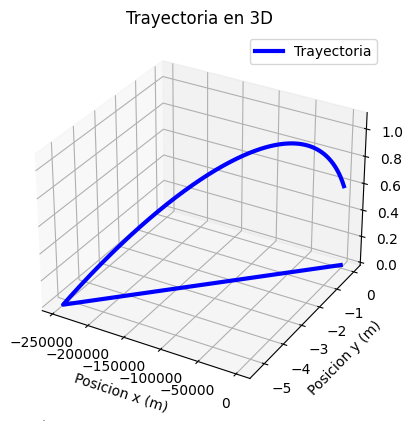

In [1]:
import matplotlib.pylab as plt
import numpy as np
'''Exercise 3 with Coriolis effect. No air friction nor centrifugal force effect'''
#Constants
G = 6.67259 * (10**-11)
Me = 5.98 * (10**24)
Re = 6.377 * (10**6)

#parametros del problema, unidades S.I.
m = 2010
w = (2*np.pi)/(24*3600)

#Calculo de grados sexagesimales a radianes:
ag = 25*np.pi/180

#condiciones inciales. posicion y velocidad inicial
vo= 6752.910812478949
xo=0 ; yo=0 ; zo= 600000 ; vox=0 ; voy= np.cos(ag)*vo ; voz = np.sin(ag)*vo

#salto de tiempo y tiempo final de la simulación
#El tiempo final viene dado aproximando un tiro parábolico. Su ecuación quedaría: -(1/2)*g*(t**2)+v*np.sin(ag)*t+zo//
#Haciendo una simple ecuación de segundo grado. Obtenemos que la t tiene un valor de 862.62
tfinal=900; dt = (tfinal)/2000

#creamos los vectores. El de tiempo ya lo generamos
time=np.arange(0,tfinal,dt); lal=time.size;

#Y ahora las posiciones y velocidades cuando tenemos en lal cuan de largo han de ser
g = np.zeros(lal)
xx = np.zeros(lal)
yy = np.zeros(lal)
zz = np.zeros(lal)

vx = np.zeros(lal)
vy = np.zeros(lal)
vz = np.zeros(lal)

ax = np.zeros(lal)
ay = np.zeros(lal)
az = np.zeros(lal)
lat = np.zeros(lal)
long = np.zeros(lal)

#Ahora guardamos en el primer elemento de estos vectores las condiciones inicales indicadas
xx[0]=xo; yy[0]=yo; zz[0]=zo ; vx[0]=vox; vy[0]=-voy; vz[0]=voz; long[0] = -1.92 ; lat[0]= 0.82 ; g[0] = -8.197 #it's the latitude in Malmstrom AFB, Montana

# Use the condition required to finish the loop: yy=0 (m reaches the ground)
#Uso de len (time)

i=1

while zz[i - 1] >= 0:

        g[i] = -(G * Me) /(((Re+zz[i - 1])**2))


        ax[i] = 2*w*vy[i - 1]*(np.sin(lat[i-1]))
        ay[i] = -2*w*(vz[i - 1]*np.cos(lat[i-1])+vx[i-1]*np.sin(lat[i-1]))
        az[i] = 2*w*vy[i - 1]*np.cos(lat[i-1]) +g[i-1]


        vx[i] = vx[i - 1] + ax[i-1] * dt
        vy[i] = vy[i - 1] + ay[i-1] * dt
        vz[i] = vz[i - 1] + az[i-1] * dt

        xx[i] = xx[i - 1] + vx[i - 1] * dt
        yy[i] = yy[i - 1] + vy[i - 1] * dt
        zz[i] = zz[i - 1] + vz[i - 1] * dt

        dlat = (xx[i] - xx[i - 1]) / Re
        lat [i]= lat[i - 1] + dlat
        dlong = (yy[i]-yy[i-1]/(Re)*np.cos(lat[i - 1]))
        long [i] = long [i-1] +dlong

        i = i + 1

print('\n-------------------------------')

tfinreal=time[i-1]
yfinreal=yy[i-1]
xfinreal = xx[i-1]
zfinreal = zz[i-1]

print('The final time: ', tfinreal, 's')
print('The total range (in module) of the trajectory is:', np.round(np.sqrt((xfinreal-xx[0])**2+(yfinreal-yy[0])**2+(zfinreal-zz[0])**2),2),' m.', "(In km: ",np.round(np.sqrt((xfinreal-xx[0])**2+(yfinreal-yy[0])**2+(zfinreal-zz[0])**2)/1000,2),"km)" )
print('\nThe increment of longitude is:', np.round((yfinreal),2), ' m.', "(In km: ",np.round((yfinreal)/1000,2),"km)" )
print('The increment of latitude is :', np.round(xfinreal,2),'m')
print('The increment of altitude is:', np.round((zfinreal-zz[0]),2),'m',  "(In km: ",np.round((zfinreal-zz[0])/1000,2),"km)")

#Plot results:

# Graph that prints the positions of y and z respect the time.
plt.figure(1)
plt.plot(time,yy,'k',label='y');
plt.plot(time,zz,'b',label='z');
plt.xlabel('Tiempo (s)');
plt.ylabel('Posiciones (m)'); plt.legend(loc=1,prop={'size':16})
plt.xlim(0,tfinreal)
plt.show()

# Graph that prints the velocities of vy and vz respect the time.
plt.figure(2)
plt.plot(time,vy,'k',label='vy'); plt.plot(time,vz,'b',label='vz'); plt.xlabel('Tiempo (s)');
plt.ylabel('Velocidades (m/s)'); plt.legend(loc=1,prop={'size':16})
plt.xlim(0,tfinreal)
plt.show()

# Graph in the trajectory x-y-z (3D) (Ignore the printed line in z=0)
plt.figure(3)
plt.axes(projection = "3d")
plt.plot(xx, yy, zz, linewidth = 3, color = "blue", label = "Trayectoria")
plt.legend()
plt.xlabel("Posicion x (m)")
plt.ylabel("Posicion y (m)")
plt.title("Trayectoria en 3D")
plt.show()



## Exercise 4


-------------------------------
The final time:  861.0 s
The total range (in module) of the trajectory is: 4707088.23  m. (In km:  4707.09 km)

The increment of longitude is: -4664397.88  m. (In km:  -4664.4 km)
The increment of latitude is : -199558.53 m
The increment of altitude is: -600206.91 m (In km:  -600.21 km)


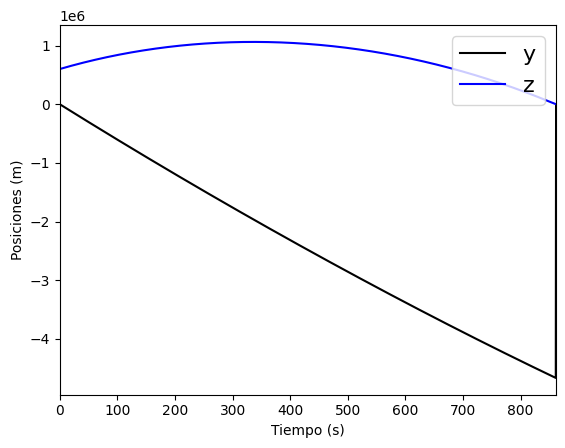

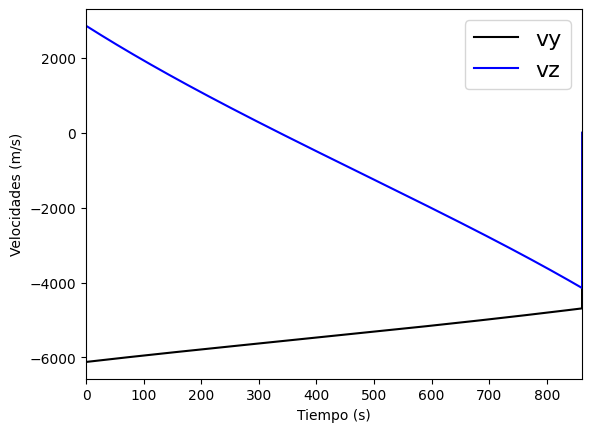

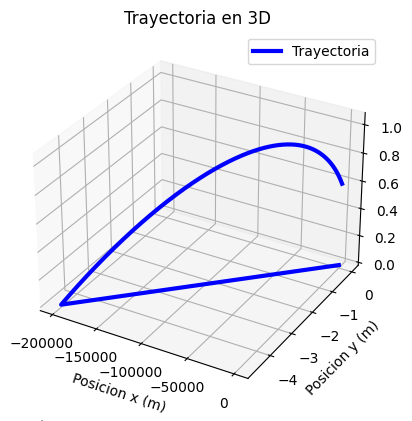

In [2]:
import matplotlib.pylab as plt
import numpy as np

#Constants
G = 6.67259 * (10**-11)
Me = 5.98 * (10**24)
Re = 6.377 * (10**6)

#parametros del problema, unidades S.I.
m = 2010
w = (2*np.pi)/(24*3600)

#Calculo de grados sexagesimales a radianes:
ag = 25*np.pi/180

#condiciones inciales. posicion y velocidad inicial
vo= 6752.910812478949
xo=0 ; yo=0 ; zo= 600000 ; vox=0 ; voy= np.cos(ag)*vo ; voz = np.sin(ag)*vo

#salto de tiempo y tiempo final de la simulación
#El tiempo final viene dado aproximando un tiro parábolico. Su ecuación quedaría: -(1/2)*g*(t**2)+v*np.sin(ag)*t+zo//
#Haciendo una simple ecuación de segundo grado. Obtenemos que la t tiene un valor de 862.62
tfinal=1000; dt = (tfinal)/2000

#creamos los vectores. El de tiempo ya lo generamos
time=np.arange(0,tfinal,dt); lal=time.size;

#Y ahora las posiciones y velocidades cuando tenemos en lal cuan de largo han de ser
g = np.zeros(lal)
xx = np.zeros(lal)
yy = np.zeros(lal)
zz = np.zeros(lal)

vx = np.zeros(lal)
vy = np.zeros(lal)
vz = np.zeros(lal)
vmod = np.zeros(lal)



ax = np.zeros(lal)
ay = np.zeros(lal)
az = np.zeros(lal)
lat = np.zeros(lal)
long = np.zeros(lal)

#Ahora guardamos en el primer elemento de estos vectores las condiciones inicales indicadas
xx[0]=xo; yy[0]=yo; zz[0]=zo ; vx[0]=vox; vy[0]=-voy; vz[0]=voz; long[0] = -1.92 ; lat[0]= 0.82 ; g[0] = -8.197 ; vmod[0] = np.sqrt((vx[0]**2 + vy[0]**2 + vz[0]**2))  #it's the latitude in Malmstrom AFB, Montana

# Use the condition required to finish the loop: yy=0 (m reaches the ground)
#Uso de len (time)

i=1
b= 0.0001
while zz[i - 1] > 0:

        g[i] = -(G * Me) /(((Re+zz[i - 1])**2))

        ax[i] = 2*w*vy[i - 1]*(np.sin(lat[i-1])) - ((b/m)*vmod[i-1]*vx[i-1]) +(w**2)*(zz[i-1]+Re)*np.sin(lat[i-1])*np.cos(lat[i-1])
        ay[i] = -2*w*(vz[i - 1]*np.cos(lat[i-1])+vx[i-1]*np.sin(lat[i-1])) -(b/m)*vmod[i-1]*vy[i-1]
        az[i] = 2*w*vy[i - 1]*np.cos(lat[i-1]) +g[i-1] - ((b/m)*vmod[i-1]*vz[i-1]) +(w**2)*(zz[i-1]+Re)*(np.cos(lat[i-1]))**2


        vx[i] = vx[i - 1] + ax[i-1] * dt
        vy[i] = vy[i - 1] + ay[i-1] * dt
        vz[i] = vz[i - 1] + az[i-1] * dt
        vmod[i] = np.sqrt(vx[i-1]**2 + vy[i-1]**2 + vz[i-1]**2)

        xx[i] = xx[i - 1] + vx[i - 1] * dt
        yy[i] = yy[i - 1] + vy[i - 1] * dt
        zz[i] = zz[i - 1] + vz[i - 1] * dt

        dlat = -(xx[i] - xx[i - 1]) / (Re)
        lat [i]= lat[i - 1] + dlat
        dlong = (yy[i]-yy[i-1])/(Re*np.cos(lat[i - 1]))
        long [i] = long [i-1] +dlong

        i = i + 1

print('\n-------------------------------')

tfinreal=time[i-1]
yfinreal=yy[i-1]
xfinreal = xx[i-1]
zfinreal = zz[i-1]

print('The final time: ', tfinreal, 's')
print('The total range (in module) of the trajectory is:', np.round(np.sqrt((xfinreal-xx[0])**2+(yfinreal-yy[0])**2+(zfinreal-zz[0])**2),2),' m.', "(In km: ",np.round(np.sqrt((xfinreal-xx[0])**2+(yfinreal-yy[0])**2+(zfinreal-zz[0])**2)/1000,2),"km)" )
print('\nThe increment of longitude is:', np.round((yfinreal),2), ' m.', "(In km: ",np.round((yfinreal)/1000,2),"km)" )
print('The increment of latitude is :', np.round(xfinreal,2),'m')
print('The increment of altitude is:', np.round((zfinreal-zz[0]),2),'m',  "(In km: ",np.round((zfinreal-zz[0])/1000,2),"km)")

#Plot results:

# Graph that prints the positions of y and z respect the time.
plt.figure(1)
plt.plot(time,yy,'k',label='y');
plt.plot(time,zz,'b',label='z');
plt.xlabel('Tiempo (s)');
plt.ylabel('Posiciones (m)'); plt.legend(loc=1,prop={'size':16})
plt.xlim(0,tfinreal)
plt.show()

# Graph that prints the velocities of vy and vz respect the time.
plt.figure(2)
plt.plot(time,vy,'k',label='vy'); plt.plot(time,vz,'b',label='vz'); plt.xlabel('Tiempo (s)');
plt.ylabel('Velocidades (m/s)'); plt.legend(loc=1,prop={'size':16})
plt.xlim(0,tfinreal)
plt.show()

# Graph in the trajectory x-y-z (3D) (Ignore the printed line in z=0)
plt.figure(3)
plt.axes(projection = "3d")
plt.plot(xx, yy, zz, linewidth = 3, color = "blue", label = "Trayectoria")
plt.legend()
plt.xlabel("Posicion x (m)")
plt.ylabel("Posicion y (m)")
plt.title("Trayectoria en 3D")
plt.show()


#Extra suppositions / hypothesis

# 1. What would happen if the Earth did not rotate?


"We assume that the angular velocity is equal to 0"
3D graph showing the trajectory under these conditions:
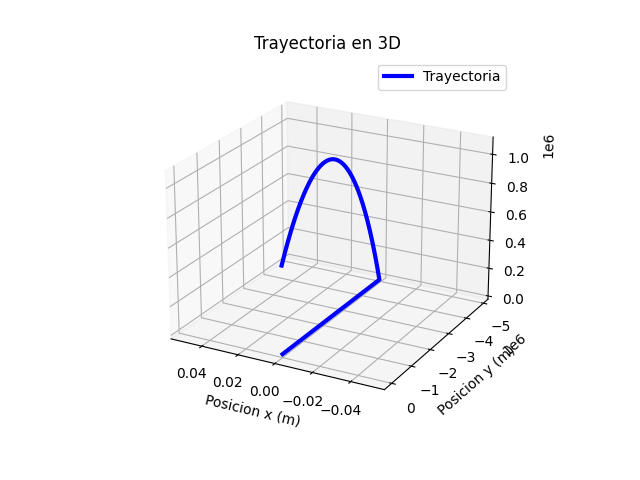






-------------------------------
The final time:  915.5 s
The total range (in module) of the trajectory is: 4956100.85  m. (In km:  4956.1 km)

The increment of longitude is: -4919493.25  m. (In km:  -4919.49 km)
The increment of latitude is : 0.0 m
The increment of altitude is: -601266.84 m (In km:  -601.27 km)


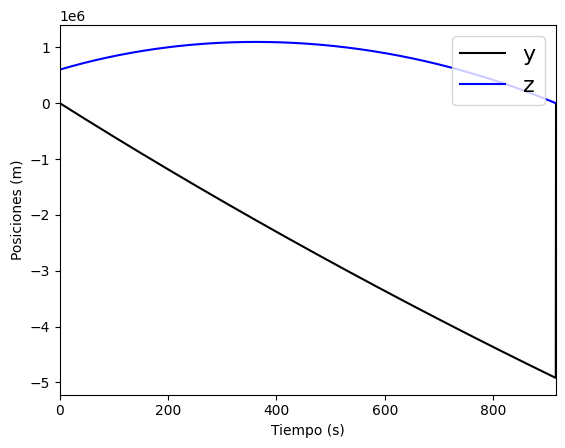

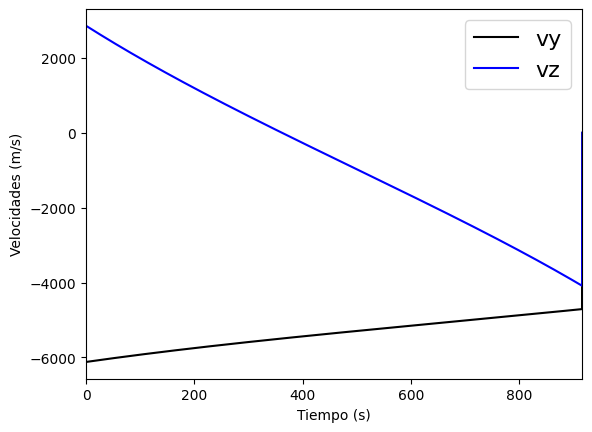

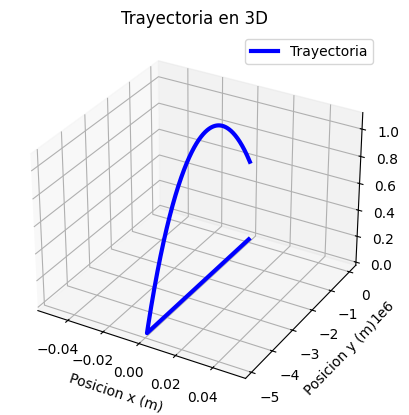

In [8]:
import matplotlib.pylab as plt
import numpy as np

#Constants
G = 6.67259 * (10**-11)
Me = 5.98 * (10**24)
Re = 6.377 * (10**6)

#parametros del problema, unidades S.I.
m = 2010
w = 0
#Calculo de grados sexagesimales a radianes:
ag = 25*np.pi/180

#condiciones inciales. posicion y velocidad inicial
vo= 6752.910812478949
xo=0 ; yo=0 ; zo= 600000 ; vox=0 ; voy= np.cos(ag)*vo ; voz = np.sin(ag)*vo

#salto de tiempo y tiempo final de la simulación
#El tiempo final viene dado aproximando un tiro parábolico. Su ecuación quedaría: -(1/2)*g*(t**2)+v*np.sin(ag)*t+zo//
#Haciendo una simple ecuación de segundo grado. Obtenemos que la t tiene un valor de 862.62
tfinal=1000; dt = (tfinal)/2000

#creamos los vectores. El de tiempo ya lo generamos
time=np.arange(0,tfinal,dt); lal=time.size;

#Y ahora las posiciones y velocidades cuando tenemos en lal cuan de largo han de ser
g = np.zeros(lal)
xx = np.zeros(lal)
yy = np.zeros(lal)
zz = np.zeros(lal)

vx = np.zeros(lal)
vy = np.zeros(lal)
vz = np.zeros(lal)
vmod = np.zeros(lal)



ax = np.zeros(lal)
ay = np.zeros(lal)
az = np.zeros(lal)
lat = np.zeros(lal)
long = np.zeros(lal)

#Ahora guardamos en el primer elemento de estos vectores las condiciones inicales indicadas
xx[0]=xo; yy[0]=yo; zz[0]=zo ; vx[0]=vox; vy[0]=-voy; vz[0]=voz; long[0] = -1.92 ; lat[0]= 0.82 ; g[0] = -8.197 ; vmod[0] = np.sqrt((vx[0]**2 + vy[0]**2 + vz[0]**2))  #it's the latitude in Malmstrom AFB, Montana

# Use the condition required to finish the loop: yy=0 (m reaches the ground)
#Uso de len (time)

i=1
b= 0.0001
while zz[i - 1] > 0:

        g[i] = -(G * Me) /(((Re+zz[i - 1])**2))

        ax[i] = 2*w*vy[i - 1]*(np.sin(lat[i-1])) - ((b/m)*vmod[i-1]*vx[i-1]) +(w**2)*(zz[i-1]+Re)*np.sin(lat[i-1])*np.cos(lat[i-1])
        ay[i] = -2*w*(vz[i - 1]*np.cos(lat[i-1])+vx[i-1]*np.sin(lat[i-1])) -(b/m)*vmod[i-1]*vy[i-1]
        az[i] = 2*w*vy[i - 1]*np.cos(lat[i-1]) +g[i-1] - ((b/m)*vmod[i-1]*vz[i-1]) +(w**2)*(zz[i-1]+Re)*(np.cos(lat[i-1]))**2


        vx[i] = vx[i - 1] + ax[i-1] * dt
        vy[i] = vy[i - 1] + ay[i-1] * dt
        vz[i] = vz[i - 1] + az[i-1] * dt
        vmod[i] = np.sqrt(vx[i-1]**2 + vy[i-1]**2 + vz[i-1]**2)

        xx[i] = xx[i - 1] + vx[i - 1] * dt
        yy[i] = yy[i - 1] + vy[i - 1] * dt
        zz[i] = zz[i - 1] + vz[i - 1] * dt

        dlat = -(xx[i] - xx[i - 1]) / (Re)
        lat [i]= lat[i - 1] + dlat
        dlong = (yy[i]-yy[i-1])/(Re*np.cos(lat[i - 1]))
        long [i] = long [i-1] +dlong

        i = i + 1

print('\n-------------------------------')

tfinreal=time[i-1]
yfinreal=yy[i-1]
xfinreal = xx[i-1]
zfinreal = zz[i-1]

print('The final time: ', tfinreal, 's')
print('The total range (in module) of the trajectory is:', np.round(np.sqrt((xfinreal-xx[0])**2+(yfinreal-yy[0])**2+(zfinreal-zz[0])**2),2),' m.', "(In km: ",np.round(np.sqrt((xfinreal-xx[0])**2+(yfinreal-yy[0])**2+(zfinreal-zz[0])**2)/1000,2),"km)" )
print('\nThe increment of longitude is:', np.round((yfinreal),2), ' m.', "(In km: ",np.round((yfinreal)/1000,2),"km)" )
print('The increment of latitude is :', np.round(xfinreal,2),'m')
print('The increment of altitude is:', np.round((zfinreal-zz[0]),2),'m',  "(In km: ",np.round((zfinreal-zz[0])/1000,2),"km)")

#Plot results:

# Graph that prints the positions of y and z respect the time.
plt.figure(1)
plt.plot(time,yy,'k',label='y');
plt.plot(time,zz,'b',label='z');
plt.xlabel('Tiempo (s)');
plt.ylabel('Posiciones (m)'); plt.legend(loc=1,prop={'size':16})
plt.xlim(0,tfinreal)
plt.show()

# Graph that prints the velocities of vy and vz respect the time.
plt.figure(2)
plt.plot(time,vy,'k',label='vy'); plt.plot(time,vz,'b',label='vz'); plt.xlabel('Tiempo (s)');
plt.ylabel('Velocidades (m/s)'); plt.legend(loc=1,prop={'size':16})
plt.xlim(0,tfinreal)
plt.show()

# Graph in the trajectory x-y-z (3D) (Ignore the printed line in z=0)
plt.figure(3)
plt.axes(projection = "3d")
plt.plot(xx, yy, zz, linewidth = 3, color = "blue", label = "Trayectoria")
plt.legend()
plt.xlabel("Posicion x (m)")
plt.ylabel("Posicion y (m)")
plt.title("Trayectoria en 3D")
plt.show()



# 2. What would happen if we carried out the experiment under the same initial conditions but only under the gravitational pull of the moon.
("For the correct realization we will change the parameters of the mass and radius of the planet in addition to assuming a null rotation")

3D graph showing the trajectory under these conditions:
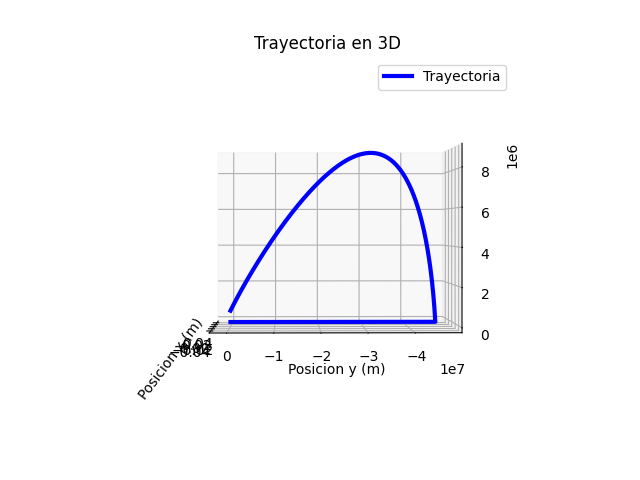
It generates an interesting trajectory for us since the very low gravitational interaction that our object experiences gives it time to reach a great height. If it is true that if we did not propose a friction force our missile would be able to leave the lunar orbit without problem but we would not have information to show as in this graph.


### What if the W-E minuteman were released? (Change angle)
"We change the angle from 25 degrees to 155 in order to change the shooting direction."

3D graph showing the trajectory under these conditions:
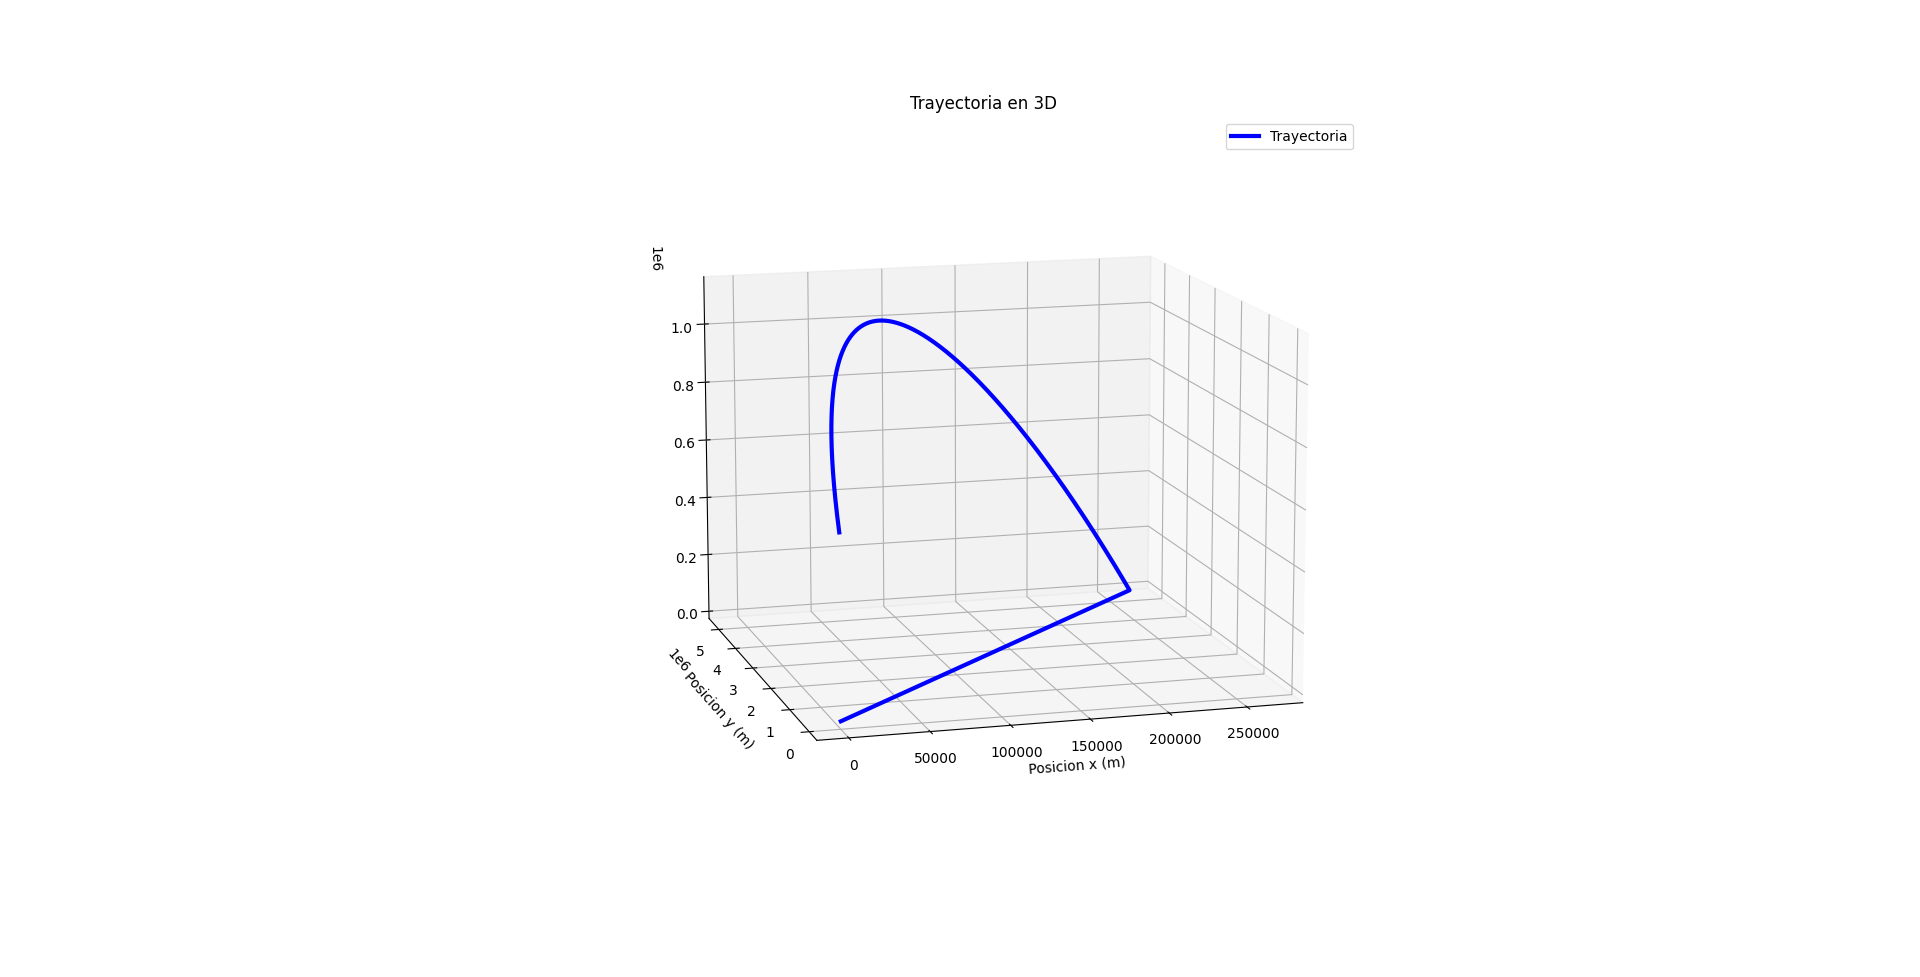
In the results shown when executing the Python program we could observe that the longitude and latitude have varied considerably with respect to our first launch with 25 degrees from the horizontal.


###What if instead of being in the northern hemisphere, we were in the southern hemisphere? (Latitude and longitude)

"To carry it out, we will simply change the sign to latitude and longitude to find ourselves in a position in the southern hemisphere."

3D graph showing the trajectory under these conditions:
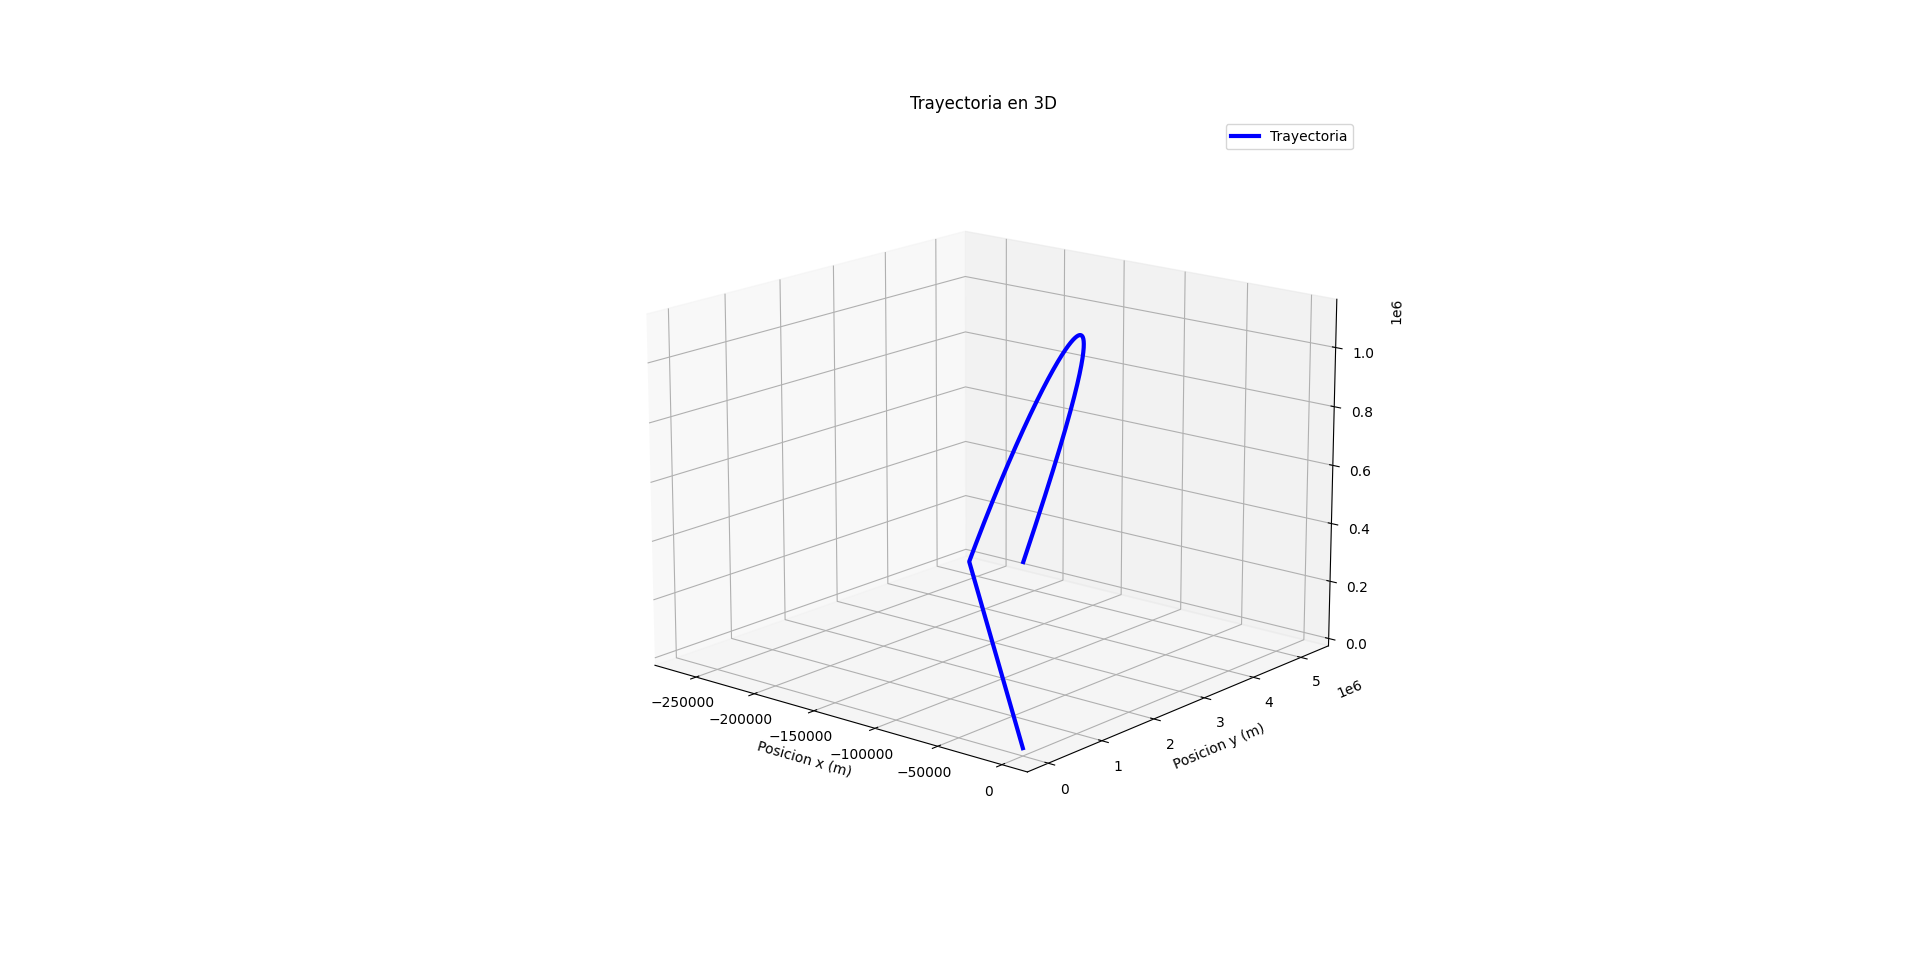
We can see that the coriolis effect manifests in a contrary way to the execution of the program for the first time where we were in the northern hemisphere.



-------------------------------
The final time:  32056.0 s
The total range (in module) of the trajectory is: 46323665.0  m. (In km:  46323.67 km)

The increment of longitude is: -46319776.88  m. (In km:  -46319.78 km)
The increment of latitude is : 0.0 m
The increment of altitude is: -600174.06 m (In km:  -600.17 km)


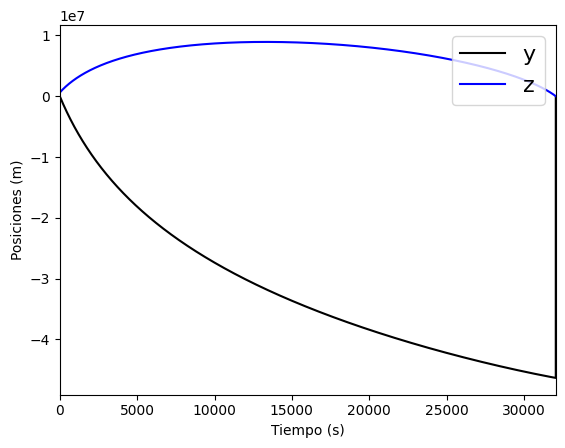

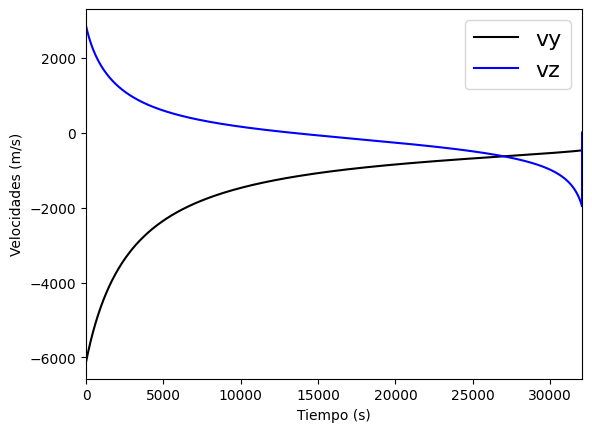

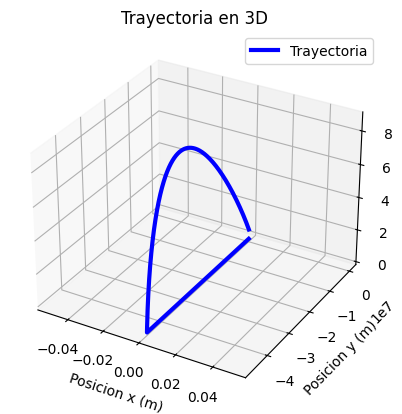

In [13]:
import matplotlib.pylab as plt
import numpy as np

'''Ejercicio 3 con coriolis, sin fuerza de fricción ni centrifuga'''
#Constants
G = 6.67259 * (10**-11)
Me = 7.35 * (10**22)
Re = 1737 * (10**3)
#parametros del problema, unidades S.I.
m = 2010; w = 0

#Calculo de grados sexagesimales a radianes:
ag = 25*np.pi/180

#condiciones inciales. posicion y velocidad inicial
vo= 6752.910812478949

xo=0 ; yo=0 ; zo= 600000 ; vox=0 ; voy= np.cos(ag)*vo ; voz = np.sin(ag)*vo

#salto de tiempo y tiempo final de la simulación
#El tiempo final viene dado aproximando un tiro parábolico. Su ecuación quedaría: -(1/2)*g*(t**2)+v*np.sin(ag)*t+zo//
#Haciendo una simple ecuación de segundo grado. Obtenemos que la t tiene un valor de 862.62
tfinal=100000; dt = (tfinal)/100000

#creamos los vectores. El de tiempo ya lo generamos
time=np.arange(0,tfinal,dt); lal=time.size;

#Y ahora las posiciones y velocidades cuando tenemos en lal cuan de largo han de ser
g = np.zeros(lal)
xx = np.zeros(lal)
yy = np.zeros(lal)
zz = np.zeros(lal)

vx = np.zeros(lal)
vy = np.zeros(lal)
vz = np.zeros(lal)
vmod = np.zeros(lal)



ax = np.zeros(lal)
ay = np.zeros(lal)
az = np.zeros(lal)
lat = np.zeros(lal)
long = np.zeros(lal)

#Ahora guardamos en el primer elemento de estos vectores las condiciones inicales indicadas
xx[0]=xo; yy[0]=yo; zz[0]=zo ; vx[0]=vox; vy[0]=-voy; vz[0]=voz; long[0] = -1.92 ; lat[0]= 0.82 ; g[0] = -(G * Me)/(Re+600000)**2 ; vmod[0] = np.sqrt((vx[0]**2 + vy[0]**2 + vz[0]**2))  #it's the latitude in Malmstrom AFB, Montana

# Use the condition required to finish the loop: yy=0 (m reaches the ground)
#Uso de len (time)

i=1
b= 0.0001
while zz[i - 1] > 0:

        g[i] = -(G * Me) /(((Re+zz[i - 1])**2))

        ax[i] = 2*w*vy[i - 1]*(np.sin(lat[i-1])) - ((b/m)*vmod[i-1]*vx[i-1]) +(w**2)*(zz[i-1]+Re)*np.sin(lat[i-1])*np.cos(lat[i-1])
        ay[i] = -2*w*(vz[i - 1]*np.cos(lat[i-1])+vx[i-1]*np.sin(lat[i-1])) -(b/m)*vmod[i-1]*vy[i-1]
        az[i] = 2*w*vy[i - 1]*np.cos(lat[i-1]) +g[i-1] - ((b/m)*vmod[i-1]*vz[i-1]) +(w**2)*(zz[i-1]+Re)*(np.cos(lat[i-1]))**2


        vx[i] = vx[i - 1] + ax[i-1] * dt
        vy[i] = vy[i - 1] + ay[i-1] * dt
        vz[i] = vz[i - 1] + az[i-1] * dt
        vmod[i] = np.sqrt(vx[i-1]**2 + vy[i-1]**2 + vz[i-1]**2)

        xx[i] = xx[i - 1] + vx[i - 1] * dt
        yy[i] = yy[i - 1] + vy[i - 1] * dt
        zz[i] = zz[i - 1] + vz[i - 1] * dt

        dlat = -(xx[i] - xx[i - 1]) / (Re)
        lat [i]= lat[i - 1] + dlat
        dlong = (yy[i]-yy[i-1])/(Re*np.cos(lat[i - 1]))
        long [i] = long [i-1] +dlong
        #print(g[i],zz[i],yy[i],vy[i], lat[i])
        i = i + 1

print('\n-------------------------------')

tfinreal=time[i-1]
yfinreal=yy[i-1]
xfinreal = xx[i-1]
zfinreal = zz[i-1]

print('The final time: ', tfinreal, 's')
print('The total range (in module) of the trajectory is:', np.round(np.sqrt((xfinreal-xx[0])**2+(yfinreal-yy[0])**2+(zfinreal-zz[0])**2),2),' m.', "(In km: ",np.round(np.sqrt((xfinreal-xx[0])**2+(yfinreal-yy[0])**2+(zfinreal-zz[0])**2)/1000,2),"km)" )
print('\nThe increment of longitude is:', np.round((yfinreal),2), ' m.', "(In km: ",np.round((yfinreal)/1000,2),"km)" )
print('The increment of latitude is :', np.round(xfinreal,2),'m')
print('The increment of altitude is:', np.round((zfinreal-zz[0]),2),'m',  "(In km: ",np.round((zfinreal-zz[0])/1000,2),"km)")

#Plot results
plt.figure(1)
plt.plot(time,yy,'k',label='y');
plt.plot(time,zz,'b',label='z');
plt.xlabel('Tiempo (s)');
plt.ylabel('Posiciones (m)'); plt.legend(loc=1,prop={'size':16})
plt.xlim(0,tfinreal)
plt.show()

plt.figure(2)
plt.plot(time,vy,'k',label='vy'); plt.plot(time,vz,'b',label='vz'); plt.xlabel('Tiempo (s)');
plt.ylabel('Velocidades (m/s)'); plt.legend(loc=1,prop={'size':16})
plt.xlim(0,tfinreal)
plt.show()

# Gráfico de la trayectoria x-y-z en 3 dimensiones (Ignorar linea en z=0)
plt.figure(3)
plt.axes(projection = "3d")
plt.plot(xx, yy, zz, linewidth = 3, color = "blue", label = "Trayectoria")
plt.legend()
plt.xlabel("Posicion x (m)")
plt.ylabel("Posicion y (m)")
plt.title("Trayectoria en 3D")
plt.show()

# 3. What if the W-E minuteman were released? (Change angle)
"We change the angle from 25 degrees to 155 in order to change the shooting direction."

3D graph showing the trajectory under these conditions:
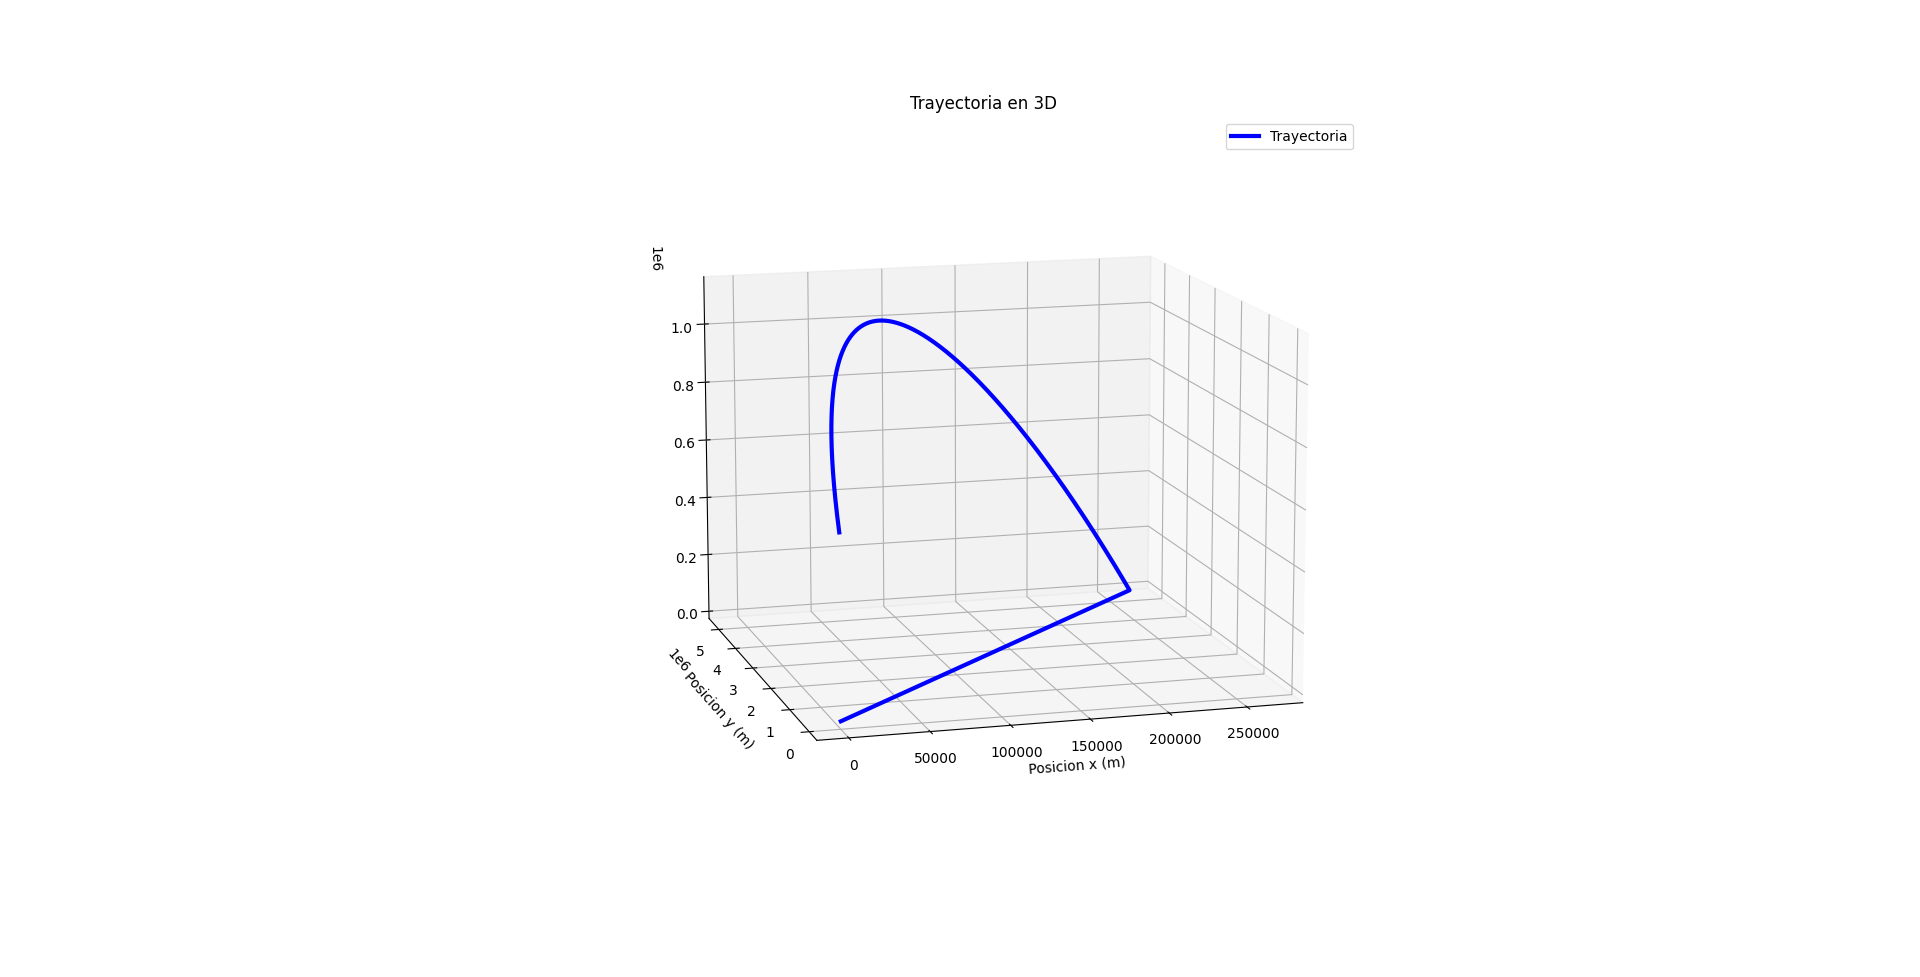
In the results shown when executing the Python program we could observe that the longitude and latitude have varied considerably with respect to our first launch with 25 degrees from the horizontal.





-------------------------------
The final time:  983.5 s
The total range (in module) of the trajectory is: 5256364.11  m. (In km:  5256.36 km)

The increment of longitude is: 5214972.94  m. (In km:  5214.97 km)
The increment of latitude is : 266601.77 m
The increment of altitude is: -601950.44 m (In km:  -601.95 km)


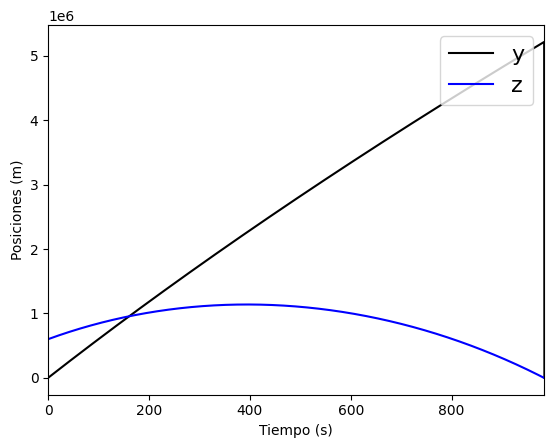

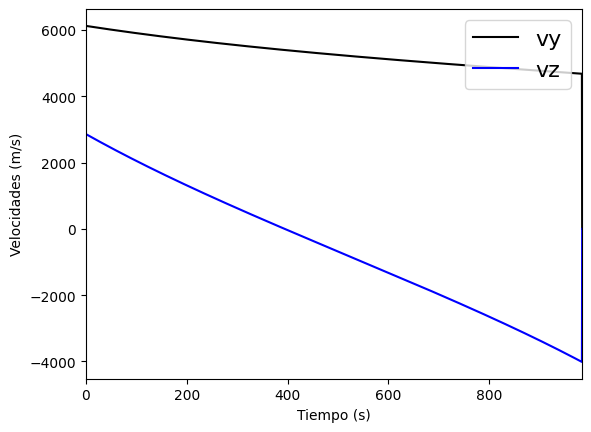

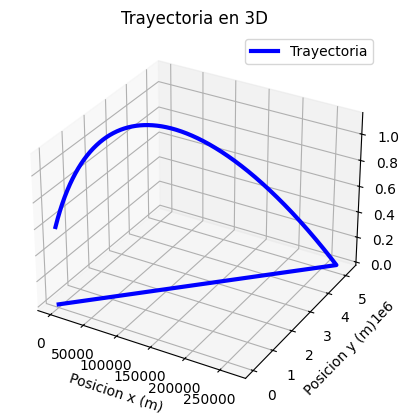

In [12]:
import matplotlib.pylab as plt
import numpy as np

#Constants
G = 6.67259 * (10**-11)
Me = 5.98 * (10**24)
Re = 6.377 * (10**6)

#parametros del problema, unidades S.I.
m = 2010
w = (2*np.pi)/(24*3600)
#Calculo de grados sexagesimales a radianes:
ag = 155*np.pi/180

#condiciones inciales. posicion y velocidad inicial
vo= 6752.910812478949
xo=0 ; yo=0 ; zo= 600000 ; vox=0 ; voy= np.cos(ag)*vo ; voz = np.sin(ag)*vo

#salto de tiempo y tiempo final de la simulación
#El tiempo final viene dado aproximando un tiro parábolico. Su ecuación quedaría: -(1/2)*g*(t**2)+v*np.sin(ag)*t+zo//
#Haciendo una simple ecuación de segundo grado. Obtenemos que la t tiene un valor de 862.62
tfinal=1000; dt = (tfinal)/2000

#creamos los vectores. El de tiempo ya lo generamos
time=np.arange(0,tfinal,dt); lal=time.size;

#Y ahora las posiciones y velocidades cuando tenemos en lal cuan de largo han de ser
g = np.zeros(lal)
xx = np.zeros(lal)
yy = np.zeros(lal)
zz = np.zeros(lal)

vx = np.zeros(lal)
vy = np.zeros(lal)
vz = np.zeros(lal)
vmod = np.zeros(lal)



ax = np.zeros(lal)
ay = np.zeros(lal)
az = np.zeros(lal)
lat = np.zeros(lal)
long = np.zeros(lal)

#Ahora guardamos en el primer elemento de estos vectores las condiciones inicales indicadas
xx[0]=xo; yy[0]=yo; zz[0]=zo ; vx[0]=vox; vy[0]=-voy; vz[0]=voz; long[0] = -1.92 ; lat[0]= 0.82 ; g[0] = -8.197 ; vmod[0] = np.sqrt((vx[0]**2 + vy[0]**2 + vz[0]**2))  #it's the latitude in Malmstrom AFB, Montana

# Use the condition required to finish the loop: yy=0 (m reaches the ground)
#Uso de len (time)

i=1
b= 0.0001
while zz[i - 1] > 0:

        g[i] = -(G * Me) /(((Re+zz[i - 1])**2))

        ax[i] = 2*w*vy[i - 1]*(np.sin(lat[i-1])) - ((b/m)*vmod[i-1]*vx[i-1]) +(w**2)*(zz[i-1]+Re)*np.sin(lat[i-1])*np.cos(lat[i-1])
        ay[i] = -2*w*(vz[i - 1]*np.cos(lat[i-1])+vx[i-1]*np.sin(lat[i-1])) -(b/m)*vmod[i-1]*vy[i-1]
        az[i] = 2*w*vy[i - 1]*np.cos(lat[i-1]) +g[i-1] - ((b/m)*vmod[i-1]*vz[i-1]) +(w**2)*(zz[i-1]+Re)*(np.cos(lat[i-1]))**2


        vx[i] = vx[i - 1] + ax[i-1] * dt
        vy[i] = vy[i - 1] + ay[i-1] * dt
        vz[i] = vz[i - 1] + az[i-1] * dt
        vmod[i] = np.sqrt(vx[i-1]**2 + vy[i-1]**2 + vz[i-1]**2)

        xx[i] = xx[i - 1] + vx[i - 1] * dt
        yy[i] = yy[i - 1] + vy[i - 1] * dt
        zz[i] = zz[i - 1] + vz[i - 1] * dt

        dlat = -(xx[i] - xx[i - 1]) / (Re)
        lat [i]= lat[i - 1] + dlat
        dlong = (yy[i]-yy[i-1])/(Re*np.cos(lat[i - 1]))
        long [i] = long [i-1] +dlong

        i = i + 1

print('\n-------------------------------')

tfinreal=time[i-1]
yfinreal=yy[i-1]
xfinreal = xx[i-1]
zfinreal = zz[i-1]

print('The final time: ', tfinreal, 's')
print('The total range (in module) of the trajectory is:', np.round(np.sqrt((xfinreal-xx[0])**2+(yfinreal-yy[0])**2+(zfinreal-zz[0])**2),2),' m.', "(In km: ",np.round(np.sqrt((xfinreal-xx[0])**2+(yfinreal-yy[0])**2+(zfinreal-zz[0])**2)/1000,2),"km)" )
print('\nThe increment of longitude is:', np.round((yfinreal),2), ' m.', "(In km: ",np.round((yfinreal)/1000,2),"km)" )
print('The increment of latitude is :', np.round(xfinreal,2),'m')
print('The increment of altitude is:', np.round((zfinreal-zz[0]),2),'m',  "(In km: ",np.round((zfinreal-zz[0])/1000,2),"km)")

#Plot results:

# Graph that prints the positions of y and z respect the time.
plt.figure(1)
plt.plot(time,yy,'k',label='y');
plt.plot(time,zz,'b',label='z');
plt.xlabel('Tiempo (s)');
plt.ylabel('Posiciones (m)'); plt.legend(loc=1,prop={'size':16})
plt.xlim(0,tfinreal)
plt.show()

# Graph that prints the velocities of vy and vz respect the time.
plt.figure(2)
plt.plot(time,vy,'k',label='vy'); plt.plot(time,vz,'b',label='vz'); plt.xlabel('Tiempo (s)');
plt.ylabel('Velocidades (m/s)'); plt.legend(loc=1,prop={'size':16})
plt.xlim(0,tfinreal)
plt.show()

# Graph in the trajectory x-y-z (3D) (Ignore the printed line in z=0)
plt.figure(3)
plt.axes(projection = "3d")
plt.plot(xx, yy, zz, linewidth = 3, color = "blue", label = "Trayectoria")
plt.legend()
plt.xlabel("Posicion x (m)")
plt.ylabel("Posicion y (m)")
plt.title("Trayectoria en 3D")
plt.show()



# 4.What if instead of being in the northern hemisphere, we were in the southern hemisphere? (Latitude and longitude)

"To carry it out, we will simply change the sign to latitude and longitude to find ourselves in a position in the southern hemisphere."

3D graph showing the trajectory under these conditions:
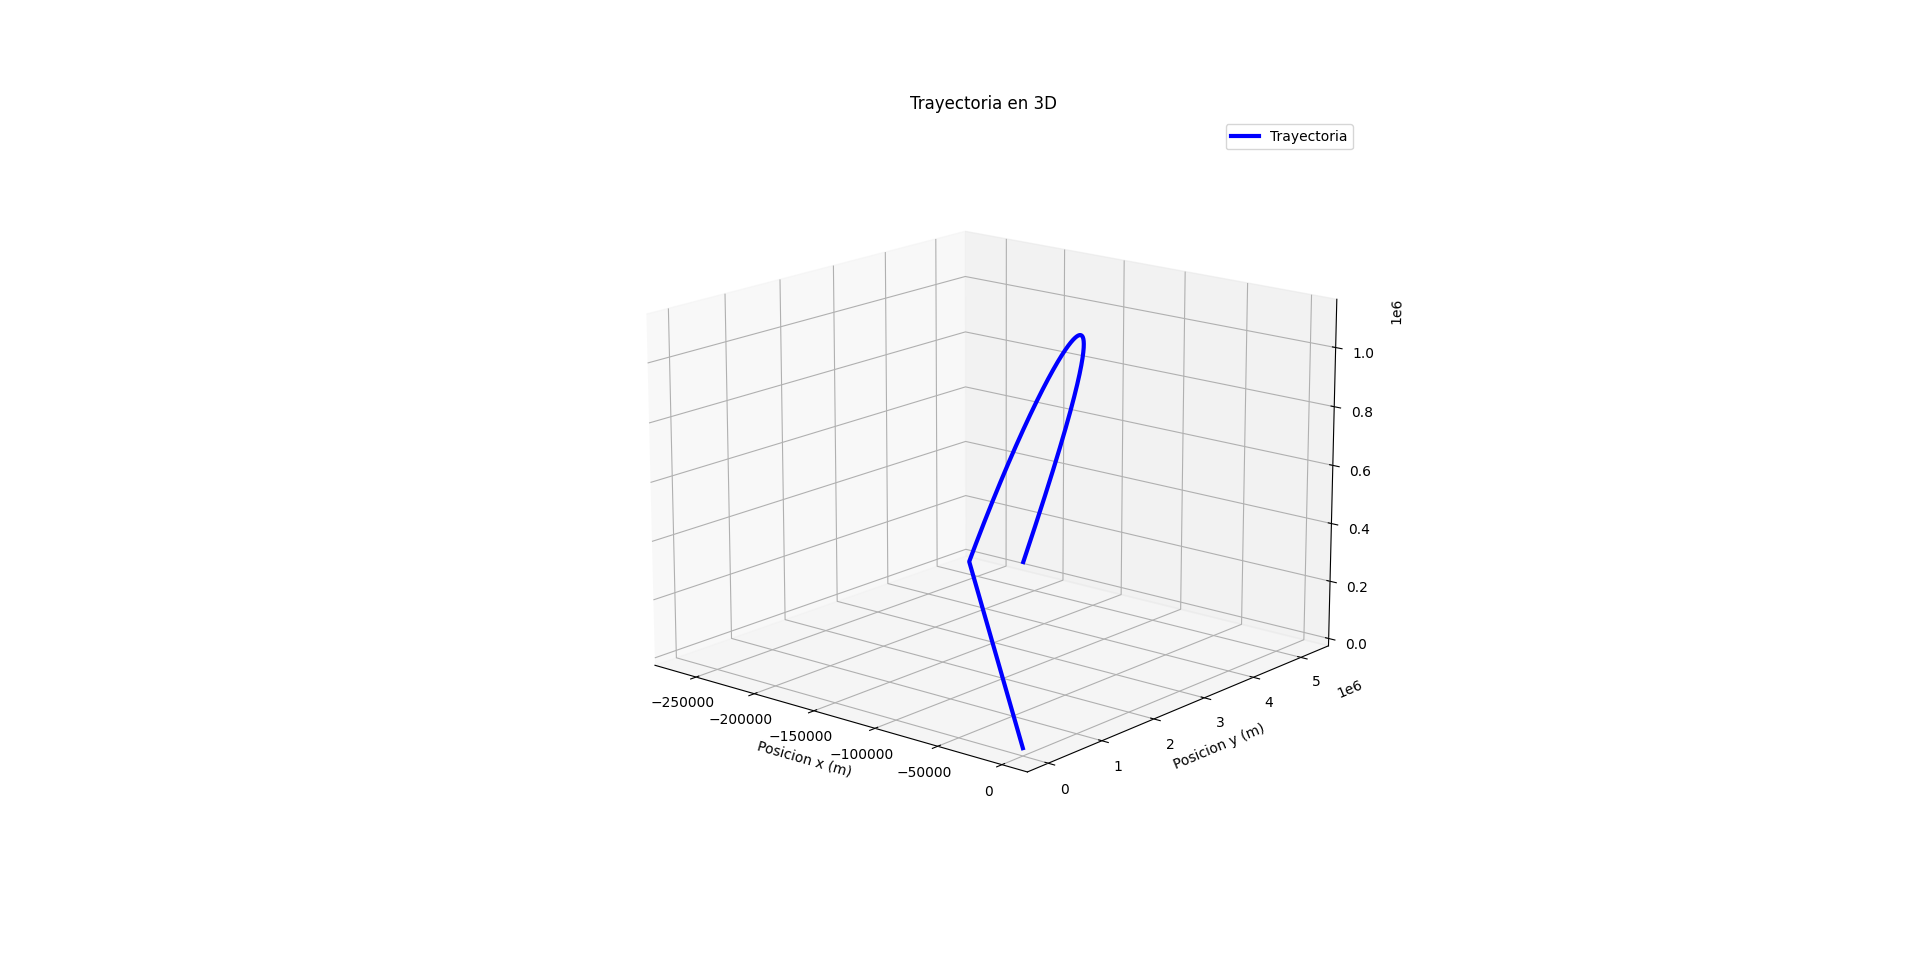
We can see that the coriolis effect manifests in a contrary way to the execution of the program for the first time where we were in the northern hemisphere.